In [1]:
import os
from glob import glob
import warnings
import json
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

In [2]:
#reference data from manual hailstone measurements

obs_csv = '/home/meso/Insync/onedrive/sync/papers/hail-xsec_paper/obs-output/obs_measurements.csv'
obs_df = pd.read_csv(obs_csv)
Dmax = obs_df['dmax_mm']
axis_ratio = obs_df['axis_ratio']

In [6]:
stats_root = '/home/meso/data/cross-section-paper-data/analysis/paper/pipeline_stats'
ignore_list = [24,26,29]

In [7]:
#list stats files
npz_ffn_list = sorted(glob(stats_root + '/*.npz'))

#plot some stats
hail_id_list = []
Dmax_list = []
mean_edge_radius_list = []
total_dry_sa = []
n_layers = []
largest_sa = []
last_sa = []
total_dry_sa = []
n_layers = []
axis_ratio_array = []

final_wetgrowth = []

#unpack
for npz_ffn in npz_ffn_list:
    npz_fn = os.path.basename(npz_ffn)
    hail_id = int(npz_fn[6:8])
    if hail_id in ignore_list:
        continue
    
    data = np.load(npz_ffn)
    hail_id_list.append(hail_id)
    output_sa_array = data['output_sa_array']
    inner_array = data['output_inner_array']
    outer_array = data['output_output_array']
    mean_edge_radius_list.append(data['mean_edge_radius'])
    
    total_dry_sa.append(np.sum(output_sa_array))
    n_layers.append(len(output_sa_array))
    largest_sa.append(np.max(output_sa_array))
    last_sa.append(output_sa_array[0])
    
    axis_ratio_array.append(axis_ratio[int(hail_id -1)])
    Dmax_list.append(Dmax[hail_id -1])

    tmp = (math.pi*(data['mean_edge_radius']**2)) - (math.pi*(outer_array[0]**2))
    if tmp/(math.pi*(outer_array[0]**2)) <= 0.1:
        try:
            tmp = (math.pi*(inner_array[0]**2)) - (math.pi*(outer_array[1]**2))
        except:
            #case for only one layer as the outer layer
            tmp = (math.pi*(data['mean_edge_radius']**2)) - output_sa_array[0]
            
    if tmp/(math.pi*(outer_array[0]**2)) < 0.2:
        print(hail_id, tmp/(math.pi*(outer_array[0]**2)))
    final_wetgrowth.append(tmp)
    
#convert lists to numpy arrays
mean_edge_radius_array = np.array(mean_edge_radius_list)
Dmax_array = np.array(Dmax_list)
total_dry_array = np.array(total_dry_sa)
n_layers_array = np.array(n_layers)
axis_ratio_array = np.array(axis_ratio_array)
last_sa_array = np.array(last_sa)
largest_sa_array = np.array(largest_sa)
final_wetgrowth_array = np.array(final_wetgrowth)

total_area = math.pi*(mean_edge_radius_array**2)

perc_dry_growth = total_dry_array/total_area
perc_largest_sa = largest_sa_array/total_area
perc_final_drygrowth = last_sa_array/total_area

perc_final_wetgrowth = final_wetgrowth_array/total_area

1 0.138022611296067
8 0.18187774085301986
10 0.15530918552688874
14 0.1046362073361093
34 0.16486442017482286
38 0.1511847613299685


[1.         0.59259259 0.43333333 0.64912281 0.26217228 0.82304527
 0.93478261 0.56666667 0.36078431 0.52897196 0.47083333 0.79036145
 0.79908676 0.47758285 0.78888889 0.58446602 0.53830228 0.76595745
 0.29530201 0.41558442 0.75       0.73809524 0.68070175 0.51282051
 0.92424242 0.89240506 0.86398554 0.82410423 0.85531197 0.51851852
 0.74       0.94029851 0.94583333 0.84367246 0.88169399 0.89076003
 0.56287425 0.54949337 0.78151261 0.95744681]


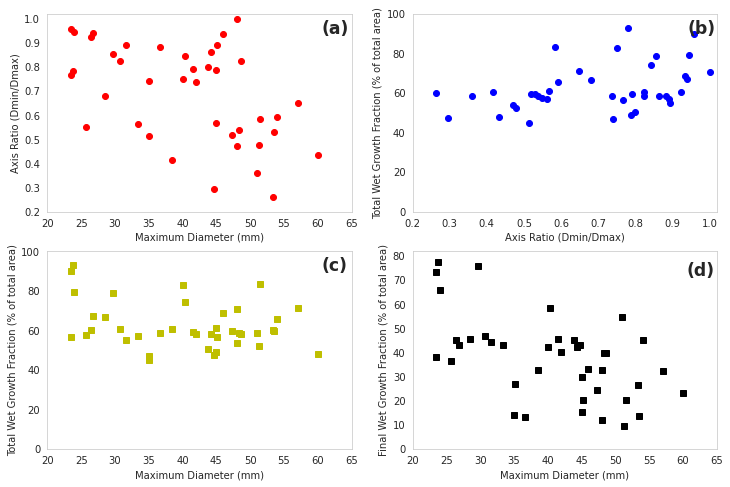

In [8]:
#make some plots
print(axis_ratio_array)
fig = plt.figure(figsize=[12,8], facecolor='w')

plt.subplot(221)
plt.plot(Dmax_list, axis_ratio_array, 'ro')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Axis Ratio (Dmin/Dmax)')
plt.xlim([20, 65])
plt.ylim([0.2, 1.02])
plt.text(60.5, 0.94, '(a)', size='xx-large', weight='bold')
plt.grid()

plt.subplot(222)
wet_growth_faction = 100-perc_dry_growth*100
plt.plot(axis_ratio_array, wet_growth_faction, 'bo')
plt.xlabel('Axis Ratio (Dmin/Dmax)')
plt.ylabel('Total Wet Growth Fraction (% of total area)')
plt.xlim([0.2, 1.02])
plt.ylim([0, 100])
plt.text(0.94, 90, '(b)', size='xx-large', weight='bold')
plt.grid()

plt.subplot(223)
plt.plot(Dmax_list, wet_growth_faction, 'ys')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Total Wet Growth Fraction (% of total area)')
plt.xlim([20, 65])
plt.ylim([0, 100])
plt.grid()
plt.text(60.5, 90, '(c)', size='xx-large', weight='bold')

plt.subplot(224)
plt.plot(Dmax_list, perc_final_wetgrowth*100, 'ks')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Final Wet Growth Fraction (% of total area)')
plt.xlim([20,65])
plt.ylim([0, 82])
plt.text(60.5, 72, '(d)', size='xx-large', weight='bold')
plt.grid()

plt.savefig('fig05.png', dpi=150)

/home/meso/miniconda3/envs/hail-xsec/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


49.91349866641007
70.89998353176807
62.431010962590406


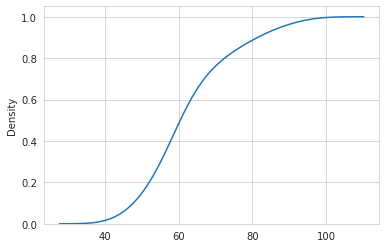

In [9]:
sns.set_style('whitegrid')
sns.kdeplot(wet_growth_faction, cumulative=True, bw=0.5)
print(np.percentile(wet_growth_faction, 12))
print(np.percentile(wet_growth_faction, 80))
print(np.mean(wet_growth_faction))

In [45]:
print(np.percentile(perc_final_wetgrowth*100, 30))

28.885033413796915


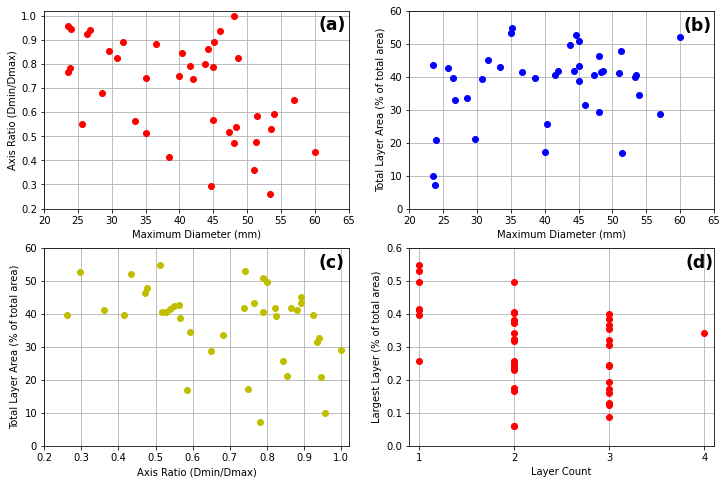

In [26]:
#make some plots

fig = plt.figure(figsize=[12,8], facecolor='w')

plt.subplot(221)
plt.plot(Dmax_list, axis_ratio_array, 'ro')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Axis Ratio (Dmin/Dmax)')
plt.xlim([20, 65])
plt.ylim([0.2, 1.02])
plt.text(60.5, 0.94, '(a)', size='xx-large', weight='bold')
plt.grid()

plt.subplot(222)
plt.plot(Dmax_list, perc_dry_growth*100, 'bo')
plt.xlabel('Maximum Diameter (mm)')
plt.ylabel('Total Layer Area (% of total area)')
plt.xlim([20,65])
plt.ylim([0, 60])
plt.text(60.5, 54, '(b)', size='xx-large', weight='bold')
plt.grid()

plt.subplot(223)
plt.plot(axis_ratio_array, perc_dry_growth*100, 'yo')
plt.xlabel('Axis Ratio (Dmin/Dmax)')
plt.ylabel('Total Layer Area (% of total area)')
plt.xlim([0.2, 1.02])
plt.ylim([0, 60])
plt.grid()
plt.text(0.94, 54, '(c)', size='xx-large', weight='bold')
plt.savefig('stats_figure.png', dpi=150)

plt.subplot(224)
plt.plot(n_layers_array, perc_largest_sa, 'ro')
plt.xlabel('Layer Count')
plt.ylabel('Largest Layer (% of total area)')
plt.xticks([1,2,3,4])
plt.xlim([0.9, 4.1])
plt.ylim([0, 0.6])
plt.text(3.8, 0.54, '(d)', size='xx-large', weight='bold')
plt.grid()